## Медленная реализация

In [1]:
# типы 
class empty:
    pass


class epsilon:
    pass


class char:
    def __init__(self, data):
        self.b = data


class star:
    def __init__(self, data):
        self.s = data


class alt:
    def __init__(self, data1, data2):
        self.s = data1
        self.t = data2


class concat:
    def __init__(self, data1, data2):
        self.s = data1
        self.t = data2

In [2]:
# match :: Regexp -> String -> Bool
def match(regexp, string):
    return isinstance(nullable(derivative_(string, regexp)), epsilon)

In [3]:
# derivative :: Char -> Regexp -> Regexp
def derivative(a, regexp):
    
    # derivative a Empty = Empty 
    if isinstance(regexp, empty) : return empty()
    
    # derivative a Epsilon = Empty
    if isinstance(regexp, epsilon) : return empty()
    
    # derivative a (Char b) | a == b = Epsilon 
    # derivative a (Char b) = Empty
    if isinstance(regexp, char): return epsilon() if a == regexp.b else empty()
    
    # derivative a (Alt s t) = Alt (derivative a s) (derivative a t)
    if isinstance(regexp, alt): return alt(derivative(a, regexp.s), derivative(a, regexp.t))
    
    #derivative a (Star s) = Concat (derivative a s) (Star s) 
    if isinstance(regexp, star): return concat(derivative(a, regexp.s), star(regexp.s))
    
    #derivative a (Concat s t) = Alt (Concat (derivative a s) t) (Concat (nullable s) (derivative a t))
    if isinstance(regexp, concat): return alt(concat(derivative(a, regexp.s), regexp.t), 
                                              concat(nullable(regexp.s), derivative(a, regexp.t)))

In [4]:
# intersect :: Regexp -> Regexp -> Regexp
def intersect(regexp1, regexp2):
    
    # intersect Empty _ = Empty 
    # intersect _ Empty = Empty
    if isinstance(regexp2, empty) or isinstance(regexp1, empty): return empty()
    
    # intersect Epsilon Epsilon = Epsilon
    if isinstance(regexp2, epsilon) and isinstance(regexp1, epsilon): return epsilon()
    

In [5]:
# union :: Regexp -> Regexp -> Regexp
def union(regexp1, regexp2):
    
    # union Epsilon _ = Epsilon 
    # union _ Epsilon = Epsilon  
    if isinstance(regexp2, epsilon) or isinstance(regexp1, epsilon): return epsilon()
    
    # union Empty Empty = Empty
    if isinstance(regexp2, empty) and isinstance(regexp1, empty): return empty()


In [6]:
# nullable :: Regexp -> Regexp
def nullable(regexp):
    
    # nullable Empty = Empty
    if isinstance(regexp, empty): return empty()
    
    # nullable Epsilon = Epsilon
    if isinstance(regexp, epsilon): return epsilon()
    
    # nullable (Char a) = Empty
    if isinstance(regexp, char): return empty()
    
    # nullable (Concat s t) = intersect (nullable s) (nullable t)
    if isinstance(regexp, concat): return intersect(nullable(regexp.s), nullable(regexp.t))
    
    # nullable (Alt s t) = union (nullable s) (nullable t)
    if isinstance(regexp, alt): return union(nullable(regexp.s), nullable(regexp.t))
    
    # nullable (Star s) = Epsilon
    if isinstance(regexp, star): return epsilon()

In [7]:
# derivative' :: String -> Regexp -> Regexp
def derivative_(string, regexp):
    if string:
        return derivative_(string[1:], derivative(string[0], regexp)) 
    return regexp

## Тесты

In [8]:
# (a*)b
regexp_1 = concat(star(char('a')), char('b'))

# (ab|a)
regexp_2 = alt(concat(char('a'), char('b')), char('a'))

# aba*
regexp_3 = concat(char('a'), concat(char('b'), star(char('a'))))

# aba(b|aa)
regexp_4 = concat(char('a'), concat(char('b'), concat(char('a'), alt(char('b'), concat(char('a'), char('a'))))))

# ((a|b)(aa|bb))
regexp_5 = concat(alt(char('a'), char('b')), alt(concat(char('a'), char('a')), concat(char('b'), char('b'))))


print('Регулярное выражение: "(a*)b"')
print('Match со строкой "aaab":', match(regexp_1, "aaab"))
print('Match со строкой "aba":', match(regexp_1, "aba"))
print('Match со строкой "ba":', match(regexp_1, "aba"))
print()

print('Регулярное выражение: "(ab|a)"')
print('Match со строкой "a":', match(regexp_2, "a"))
print('Match со строкой "ab":', match(regexp_2, "ab"))
print('Match со строкой "aba":', match(regexp_2, "aba"))
print()

print('Регулярное выражение: "aba*"')
print('Match со строкой "abaaa":', match(regexp_3, "abaaa"))
print('Match со строкой "ab":', match(regexp_3, "ab"))
print('Match со строкой "aabba":', match(regexp_3, "aabba"))
print()

print('Регулярное выражение: "aba(b|aa)"')
print('Match со строкой "abab":', match(regexp_4, "abab"))
print('Match со строкой "abaaa":', match(regexp_4, "abaaa"))
print('Match со строкой "aba":', match(regexp_4, "aba"))
print()

print('Регулярное выражение: "((a|b)(aa|bb))"')
print('Match со строкой "abb":', match(regexp_5, "abb"))
print('Match со строкой "baa":', match(regexp_5, "baa"))
print('Match со строкой "ab":', match(regexp_5, "ab"))
print('Match со строкой "bb":', match(regexp_5, "bb"))
print()


Регулярное выражение: "(a*)b"
Match со строкой "aaab": True
Match со строкой "aba": False
Match со строкой "ba": False

Регулярное выражение: "(ab|a)"
Match со строкой "a": True
Match со строкой "ab": True
Match со строкой "aba": False

Регулярное выражение: "aba*"
Match со строкой "abaaa": True
Match со строкой "ab": True
Match со строкой "aabba": False

Регулярное выражение: "aba(b|aa)"
Match со строкой "abab": True
Match со строкой "abaaa": True
Match со строкой "aba": False

Регулярное выражение: "((a|b)(aa|bb))"
Match со строкой "abb": True
Match со строкой "baa": True
Match со строкой "ab": False
Match со строкой "bb": False



### Время выполнения

In [9]:
import time


time_1 = []
for i in range(1, 7):
    exp = 'a'*i + 'b'*i
    s = time.time()
    match(regexp_5, exp)
    t = time.time()
    time_1.append(t-s)
    print('Выражение: {0}, длина: {1}, время: {2:.4f} секунд'.format(exp, i*2, (t-s)))

Выражение: ab, длина: 2, время: 0.0001 секунд
Выражение: aabb, длина: 4, время: 0.0007 секунд
Выражение: aaabbb, длина: 6, время: 0.0063 секунд
Выражение: aaaabbbb, длина: 8, время: 0.0822 секунд
Выражение: aaaaabbbbb, длина: 10, время: 0.9310 секунд
Выражение: aaaaaabbbbbb, длина: 12, время: 9.6287 секунд


## Быстрая реализация

In [10]:
def nullable(regexp):
    
    # nullable Empty = Empty
    if isinstance(regexp, empty): return False
    
    # nullable Epsilon = Epsilon
    if isinstance(regexp, epsilon): return True
    
    # nullable (Char a) = Empty
    if isinstance(regexp, char): return False
    
    # nullable (Concat s t) = intersect (nullable s) (nullable t)
    if isinstance(regexp, concat): return nullable(regexp.s) and nullable(regexp.t)
    
    # nullable (Alt s t) = union (nullable s) (nullable t)
    if isinstance(regexp, alt): return nullable(regexp.s) or nullable(regexp.t)
    
    # nullable (Star s) = Epsilon
    if isinstance(regexp, star): return True

In [11]:
def derivative(a, regexp):
    # derivative a Empty = Empty 
    if isinstance(regexp, empty) : return empty()
    
    # derivative a Epsilon = Empty
    if isinstance(regexp, epsilon) : return empty()
    
    # derivative a (Char b) | a == b = Epsilon 
    # derivative a (Char b) = Empty
    if isinstance(regexp, char): return epsilon() if a == regexp.b else empty()
    
    # derivative a (Alt s t) = Alt (derivative a s) (derivative a t)
    if isinstance(regexp, alt): return alt(derivative(a, regexp.s), derivative(a, regexp.t))
    
    #derivative a (Star s) = Concat (derivative a s) (Star s) 
    if isinstance(regexp, star): return concat(derivative(a, regexp.s), star(regexp.s))
    
    #derivative a (Concat s t) = Alt (Concat (derivative a s) t) (Concat (nullable s) (derivative a t))
    if isinstance(regexp, concat):
        if nullable(regexp.s):
            return alt(concat(derivative(a, regexp.s), regexp.t), derivative(a, regexp.t))
        else: return concat(derivative(a, regexp.s), regexp.t)

In [12]:
# derivative' :: String -> Regexp -> Regexp
def derivative_(string, regexp):
    if string:
        return derivative_(string[1:], derivative(string[0], regexp)) 
    return regexp

In [13]:
# match :: Regexp -> String -> Bool
def match(regexp, string):
    return nullable(derivative_(string, regexp))

In [14]:
# intersect :: Regexp -> Regexp -> Regexp
def intersect(regexp1, regexp2):
    
    # intersect Empty _ = Empty 
    # intersect _ Empty = Empty
    if isinstance(regexp2, empty) or isinstance(regexp1, empty): return empty()
    
    # intersect Epsilon Epsilon = Epsilon
    if isinstance(regexp2, epsilon) and isinstance(regexp1, epsilon): return epsilon()

In [15]:
# union :: Regexp -> Regexp -> Regexp
def union(regexp1, regexp2):
    
    # union Epsilon _ = Epsilon 
    # union _ Epsilon = Epsilon  
    if isinstance(regexp2, epsilon) or isinstance(regexp1, epsilon): return epsilon()
    
    # union Empty Empty = Empty
    if isinstance(regexp2, empty) and isinstance(regexp1, empty): return empty()

## Тесты

In [16]:
# (a*)b
regexp_1 = concat(star(char('a')), char('b'))

# (ab|a)
regexp_2 = alt(concat(char('a'), char('b')), char('a'))

# aba*
regexp_3 = concat(char('a'), concat(char('b'), star(char('a'))))

# aba(b|aa)
regexp_4 = concat(char('a'), concat(char('b'), concat(char('a'), alt(char('b'), concat(char('a'), char('a'))))))

# ((a|b)(aa|bb))
regexp_5 = concat(alt(char('a'), char('b')), alt(concat(char('a'), char('a')), concat(char('b'), char('b'))))


print('Регулярное выражение: "(a*)b"')
print('Match со строкой "aaab":', match(regexp_1, "aaab"))
print('Match со строкой "aba":', match(regexp_1, "aba"))
print('Match со строкой "ba":', match(regexp_1, "aba"))
print()

print('Регулярное выражение: "(ab|a)"')
print('Match со строкой "a":', match(regexp_2, "a"))
print('Match со строкой "ab":', match(regexp_2, "ab"))
print('Match со строкой "aba":', match(regexp_2, "aba"))
print()

print('Регулярное выражение: "aba*"')
print('Match со строкой "abaaa":', match(regexp_3, "abaaa"))
print('Match со строкой "ab":', match(regexp_3, "ab"))
print('Match со строкой "aabba":', match(regexp_3, "aabba"))
print()

print('Регулярное выражение: "aba(b|aa)"')
print('Match со строкой "abab":', match(regexp_4, "abab"))
print('Match со строкой "abaaa":', match(regexp_4, "abaaa"))
print('Match со строкой "aba":', match(regexp_4, "aba"))
print()

print('Регулярное выражение: "((a|b)(aa|bb))"')
print('Match со строкой "abb":', match(regexp_5, "abb"))
print('Match со строкой "baa":', match(regexp_5, "baa"))
print('Match со строкой "ab":', match(regexp_5, "ab"))
print('Match со строкой "bb":', match(regexp_5, "bb"))
print()



Регулярное выражение: "(a*)b"
Match со строкой "aaab": True
Match со строкой "aba": False
Match со строкой "ba": False

Регулярное выражение: "(ab|a)"
Match со строкой "a": True
Match со строкой "ab": True
Match со строкой "aba": False

Регулярное выражение: "aba*"
Match со строкой "abaaa": True
Match со строкой "ab": True
Match со строкой "aabba": False

Регулярное выражение: "aba(b|aa)"
Match со строкой "abab": True
Match со строкой "abaaa": True
Match со строкой "aba": False

Регулярное выражение: "((a|b)(aa|bb))"
Match со строкой "abb": True
Match со строкой "baa": True
Match со строкой "ab": False
Match со строкой "bb": False



In [17]:
import time

time_2 = []
for i in range(1, 300, 50):
    exp = 'a'*i + 'b'*i
    s = time.time()
    match(regexp_5, exp)
    t = time.time()
    time_2.append(t-s)
    print('Длина выражения: {0}, время: {1:.4f} секунд'.format(i*2, (t-s)))

Длина выражения: 2, время: 0.0000 секунд
Длина выражения: 102, время: 0.0010 секунд
Длина выражения: 202, время: 0.0019 секунд
Длина выражения: 302, время: 0.0031 секунд
Длина выражения: 402, время: 0.0036 секунд
Длина выражения: 502, время: 0.0051 секунд


## Выводы

Время значительно улучшилось: неоптимизированная версия для выражения длины 4 работает примерно за столько же, сколько оптимизированная для длины 102.

Можем построить график, чтобы сравнить обе версии:

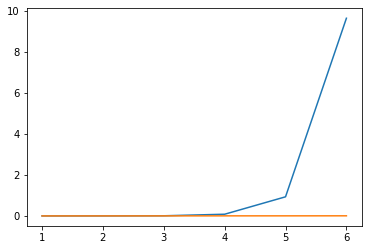

In [18]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4, 5, 6], time_1)
plt.plot([1, 2, 3, 4, 5, 6], time_2)
plt.show()

Как видно из графика, неоптимизированная версия растет экспонициально, в то время как вторая линейно